# Analysing precipitation timeseries for S-Band Salesópolis

Analisando série temporal de precipitação com PANDAS

In [111]:
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab as pl
import seaborn as sns
from scipy import stats
from geopy.distance import vincenty
import sys
%pylab inline
sys.version

Populating the interactive namespace from numpy and matplotlib


'2.7.13 |Intel Corporation| (default, Apr 27 2017, 15:33:46) \n[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]'

In [2]:
from os import environ
environ['MPLBACKEND'] = 'module://gr.matplotlib.backend_gr'

## Read 'original' data dataframes

In [3]:
df=pd.read_pickle('dataframe.pickle.gz')

In [4]:
estacoes=pd.read_csv('coordenadas_pluv_saisp.csv',sep=';',index_col=0)

In [5]:
upper_left_spol=[-23.29,-46.99]
lower_right_spol=[-24.01,-46.3]
coord_spol=[-23.600779,-45.972671]

In [6]:
def distancia(lat,lon):
    return vincenty([lat,lon],coord_spol).meters/1000.

estacoes['r_spol']=estacoes.apply(lambda x: distancia(x.lat,x.lon),axis=1)

In [7]:
estacoes.describe()

,lat,lon,r_spol
count,108.000000,108.000000,108.000000
mean,-23.589564,-46.597590,64.522869
std,0.083630,0.188712,19.052134
min,-23.752079,-47.005560,0.092848
25%,-23.648948,-46.729861,58.324064
50%,-23.602526,-46.597262,64.012825
75%,-23.528890,-46.532296,77.443794
max,-23.391110,-45.971940,107.975049


## Example plots and tests

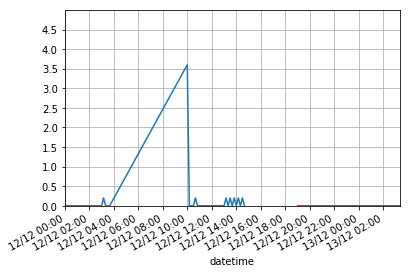

In [8]:
st6=df.loc[6,:]
p=st6.loc['20161212':'20161213'].Rg_mm_10.plot(grid=True,ylim=[0,5],yticks=np.arange(0,5.0,0.5))
p.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m %H:%M"))
p.xaxis.set_major_locator(mdates.HourLocator(interval=2))
#np.arange(0,8,0.5)

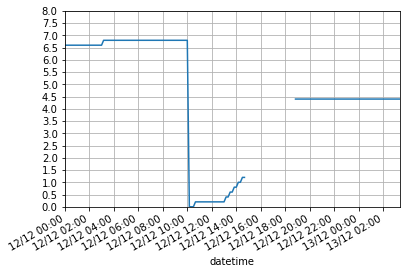

In [9]:
st6=df.loc[6,:]
p=st6.loc['20161212':'20161213'].dado.plot(grid=True,ylim=[0,8],yticks=np.arange(0,8.5,0.5))
p.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m %H:%M"))
p.xaxis.set_major_locator(mdates.HourLocator(interval=2))
#np.arange(0,8,0.5)

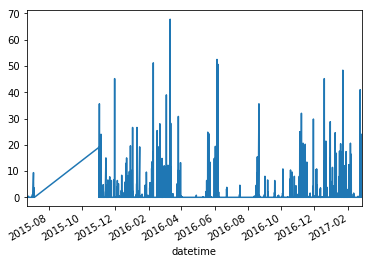

In [10]:
st6[st6.SPOL_merge!='right_only'].Rg_mm_10.plot()

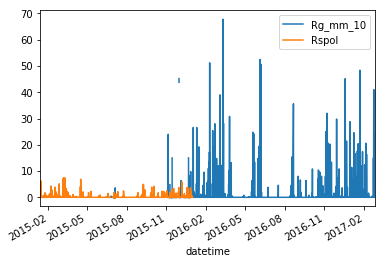

In [11]:
st6[['Rg_mm_10','Rspol']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f07c13cc490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f07bd9887d0>], dtype=object)

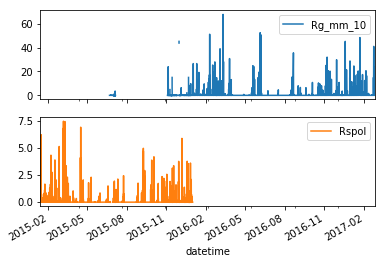

In [12]:
st6[['Rg_mm_10','Rspol']].plot(subplots=True)

In [13]:
st6.head()

,dado,Rg_mm_10,Rspol,SPOL_merge
datetime,,,,
2015-01-12 17:00:00,NaN,NaN,0.0,right_only
2015-01-12 17:05:00,NaN,NaN,0.0,right_only
2015-01-12 17:10:00,NaN,NaN,0.0,right_only
2015-01-12 17:15:00,NaN,NaN,0.0,right_only
2015-01-12 17:20:00,NaN,NaN,0.0,right_only


In [144]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    
    Reference: https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [156]:
l=np.unique(df.index.get_level_values('estacao_codigo'))
l

array([      1,       2,       5,       6,       9,      10,      11,
           137,     143,     149,     157,     168,     173,     174,
           225,     232,     234,     236,     237,     252,     273,
           274,     275,     277,     279,     280,     281,     282,
           283,     284,     286,     294,     296,     306,     344,
           346,     347,     359,     397,     405,     413,     494,
           498,     499,     508,     511,     514,     523,     527,
           528,     563,     580, 1000286, 1000346, 1000350, 1000360,
       1000370, 1000380, 1000390, 1000400, 1000410, 1000420, 1000430,
       1000440, 1000450, 1000470, 1000480, 1000490, 1000500, 1000510,
       1000520, 1000530, 1000540, 1000550, 1000560, 1000570, 1000580,
       1000590, 1000600, 1000610, 1000620, 1000630, 1000640, 1000650,
       1000660, 1000790, 1000791, 1000800, 1000814, 1000817, 1000835,
       1000837, 1000838, 1000839, 1000843, 1000845, 1000846, 1000847,
       1000851, 1000

for d in l:
    k=lag_plot(df.loc[d,:].Rg_mm_10)
    k.figure.suptitle('Lag plot estacao '+str(d))
    k.figure.savefig('lag_1_rg_'+str(d)+'.png')

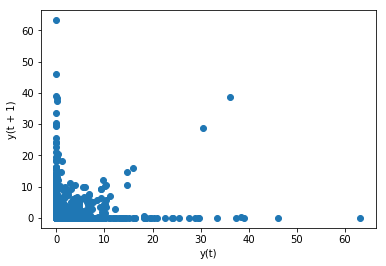

In [135]:
lag_plot(df.loc[5,:].Rg_mm_10,lag=1)

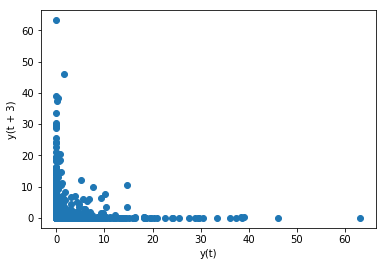

In [143]:
lag_plot(df.loc[5,:].Rg_mm_10,lag=3)

In [ ]:
crgr=np.arange(10)
for lg in np.arange(0,10):
    crgr[lg]=crosscorr(df.loc[5,:].Rg_mm_10,df.loc[5,:].Rspol,lag=lg)
print(crgr)
plt.plot(crgr)

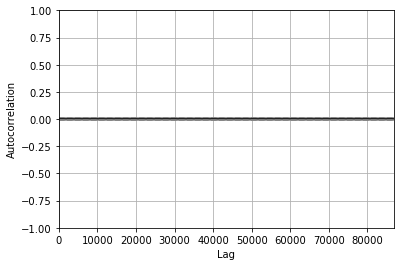

In [140]:
autocorrelation_plot(df.loc[5,:].Rg_mm_10)

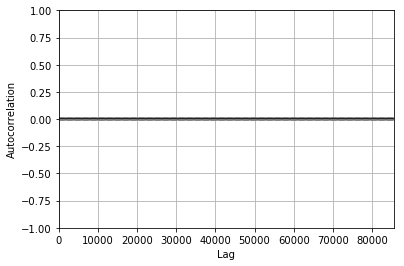

In [142]:
autocorrelation_plot(df.loc[1000410,:].dado)

In [83]:
df=df.assign(logRg=log10(df.Rg_mm_10))

/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


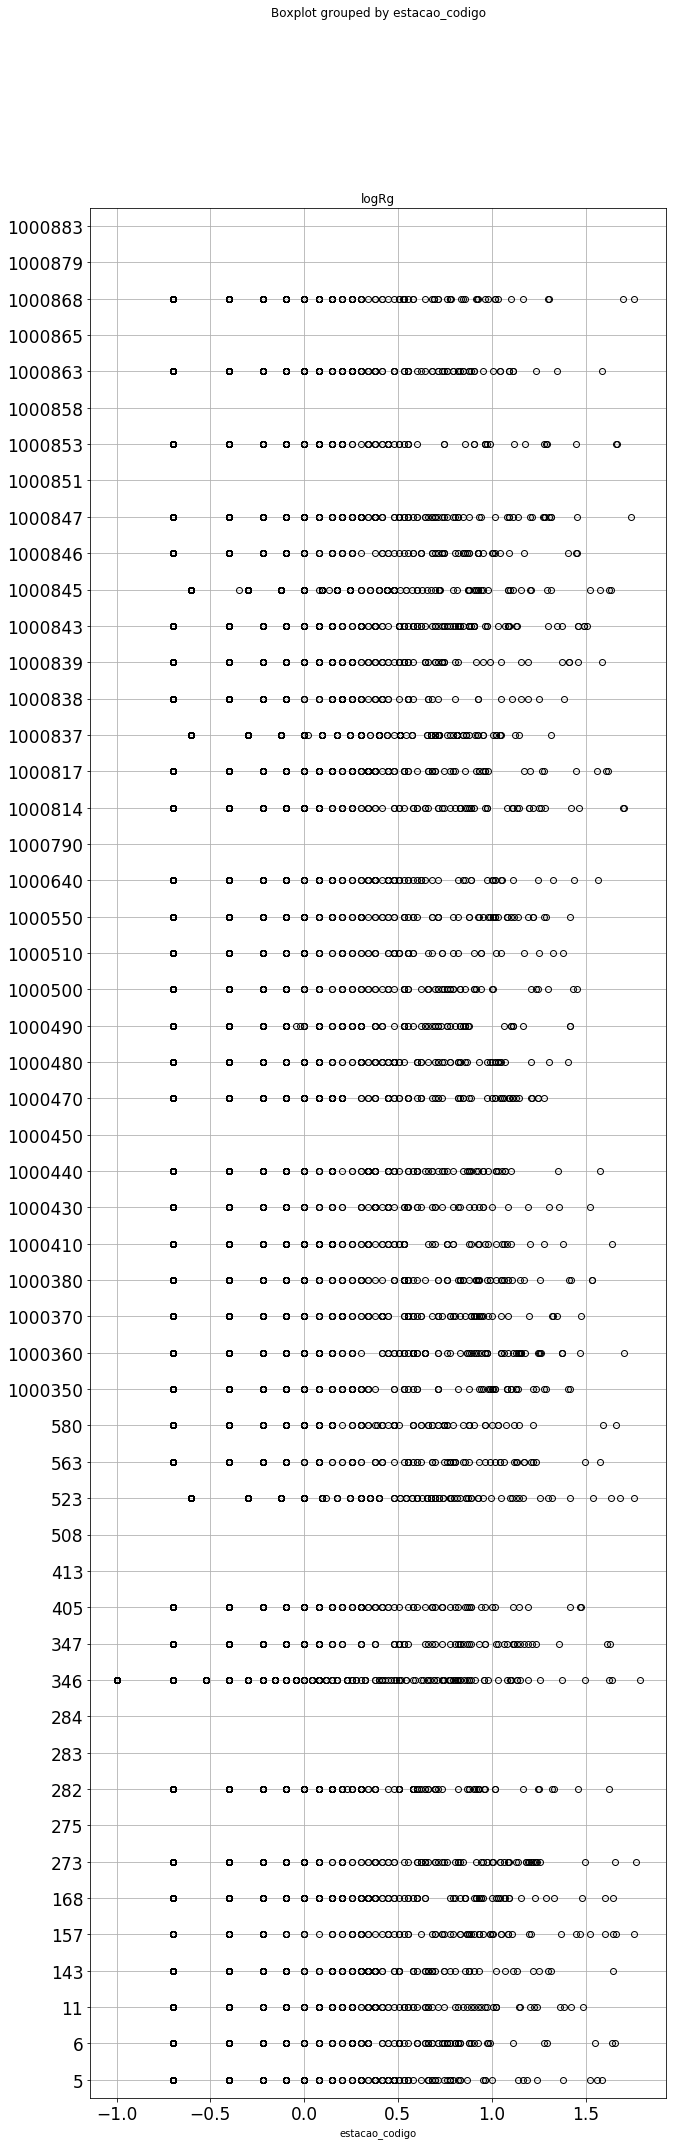

In [90]:
df.dropna().boxplot(by='estacao_codigo',column='logRg',figsize=(10,35),fontsize=17,vert=False,showmeans=True)

df.Rg_mm_10.plot.hist(bins=100)

# Read aggregated data dataframes

In [16]:
station_10m=pd.read_pickle('st10m.pkl.gz')
station_10m=station_10m.join(estacoes.r_spol)

In [17]:
station_1h=pd.read_pickle('st1h.pkl.gz')
station_1h=station_1h.join(estacoes.r_spol)

In [18]:
station_1d=pd.read_pickle('st1d.pkl.gz')
station_1d=station_1d.join(estacoes.r_spol)

## Rainrate Threshold

In [19]:
thr=1 #mm/h

## G/R Ratio

In [191]:
station_1d=station_1d.assign(gr_spol=station_1d.Rg_mm_10/station_1d.Rspol)
station_1d=station_1d.assign(logRg=log10(station_1d.Rg_mm_10))
station_1d=station_1d.assign(logRspol=log10(station_1d.Rspol))
station_1d=station_1d.assign(log_gr_spol=station_1d.logRg-station_1d.logRspol)
station_1d=station_1d.assign(log_2_gr_spol=station_1d.log_gr_spol**2)
station_1d=station_1d.assign(lagneg1_rg=station_1d.Rg_mm_10-station_1d.Rg_mm_10.shift(-1))
station_1d=station_1d.assign(lag1_rg=station_1d.Rg_mm_10.shift(1)-station_1d.Rg_mm_10)

/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [197]:
station_1h=station_1h.assign(gr_spol=station_1h.Rg_mm_10/station_1h.Rspol)
station_1h=station_1h.assign(logRg=log10(station_1h.Rg_mm_10))
station_1h=station_1h.assign(logRspol=log10(station_1h.Rspol))
station_1h=station_1h.assign(log_gr_spol=station_1h.logRg-station_1h.logRspol)
station_1h=station_1h.assign(log_2_gr_spol=station_1h.log_gr_spol**2)
station_1h=station_1h.assign(lagneg1_rg=station_1h.Rg_mm_10-station_1h.Rg_mm_10.shift(-1))
station_1h=station_1h.assign(lag1_rg=station_1h.Rg_mm_10.shift(1)-station_1h.Rg_mm_10)

/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [211]:
station_10m=station_10m.assign(gr_spol=station_10m.Rg_mm_10/station_10m.Rspol)
station_10m=station_10m.assign(logRg=log10(station_10m.Rg_mm_10))
station_10m=station_10m.assign(logRspol=log10(station_10m.Rspol))
station_10m=station_10m.assign(log_gr_spol=station_10m.logRg-station_10m.logRspol)
station_10m=station_10m.assign(log_2_gr_spol=station_10m.log_gr_spol**2)
station_10m=station_10m.assign(lagneg1_rg=station_10m.Rg_mm_10-station_10m.Rg_mm_10.shift(-1))
station_10m=station_10m.assign(lag1_rg=station_10m.Rg_mm_10.shift(1)-station_10m.Rg_mm_10)

/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/pedro/anaconda2/envs/idp/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


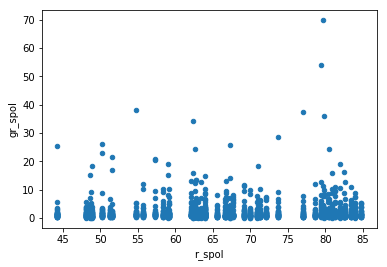

In [22]:
station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].plot.scatter(y='gr_spol',x='r_spol')#,ylim=(0,500))

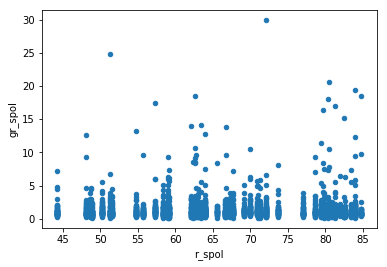

In [23]:
station_1h[(station_1h.Rg_mm_10>thr) & (station_1h.Rspol>thr)].plot.scatter(y='gr_spol',x='r_spol')#,ylim=(0,500))

In [24]:
station_1h[(station_1h.Rg_mm_10>thr) & (station_1h.Rspol>thr) &(station_1h.gr_spol>200)]

,,Rg_mm_10,Rspol,r_spol,gr_spol,logRg,logRspol,log_gr_spol,log_2_gr_spol
estacao_codigo,datetime,,,,,,,,


In [ ]:
lag_plot(station_1d.Rg_mm_10)

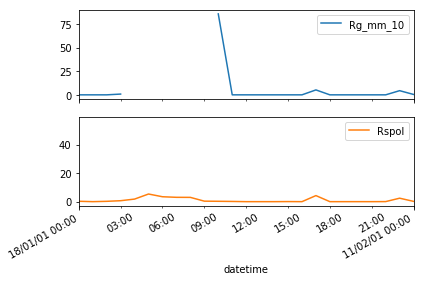

In [25]:
d=station_1h.loc[580,:][['Rg_mm_10','Rspol']].plot(subplots=True,xlim=['2015-11-02','2015-11-03'])
d[0].xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M"))
d[1].xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M"))

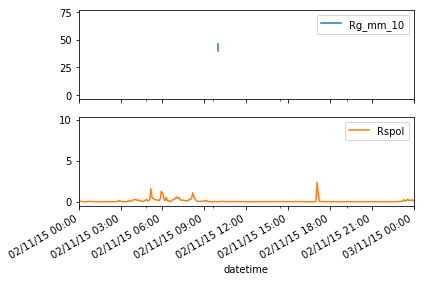

In [26]:
d=df.loc[580,:][['Rg_mm_10','Rspol']].plot(subplots=True,xlim=['2015-11-02','2015-11-03'])
d[0].xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M"))
d[1].xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M"))

In [27]:
station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr) &(station_1d.gr_spol>200)]

,,Rg_mm_10,Rspol,r_spol,gr_spol,logRg,logRspol,log_gr_spol,log_2_gr_spol
estacao_codigo,datetime,,,,,,,,


In [196]:
station_1d.query('Rg_mm_10/Rspol>30 & lag1_rg<-5 & lagneg1_rg>5')

,,Rg_mm_10,Rspol,r_spol,gr_spol,logRg,logRspol,log_gr_spol,log_2_gr_spol,lag1_rg,lagneg1_rg
estacao_codigo,datetime,,,,,,,,,,
6,2015-11-30,89.4,0.126986,70.906389,704.015078,1.951338,-0.896244,2.847582,8.108723,-46.0,89.4
284,2015-12-23,29.0,0.067097,80.560741,432.211694,1.462398,-1.173299,2.635697,6.946896,-13.4,29.0
413,2015-11-30,34.4,0.254684,67.263851,135.069518,1.536558,-0.593999,2.130557,4.539275,-14.0,34.2
508,2015-11-30,24.6,0.183067,48.114501,134.377093,1.390935,-0.737390,2.128325,4.529768,-14.8,24.6
1000410,2015-11-24,18.0,0.101545,62.157906,177.261458,1.255273,-0.993342,2.248614,5.056266,-10.4,18.0
1000440,2015-12-13,10.6,0.296085,82.660977,35.800571,1.025306,-0.528584,1.553890,2.414574,-10.6,10.6
1000640,2015-12-27,99.8,0.207736,83.948347,480.417838,1.999131,-0.682489,2.681619,7.191081,-50.6,99.8
1000790,2015-12-27,125.8,3.354983,77.066095,37.496464,2.099681,0.525690,1.573990,2.477446,-54.8,125.8
1000839,2015-11-30,51.6,0.106724,62.439258,483.491634,1.712650,-0.971739,2.684389,7.205944,-15.6,51.6


In [200]:
station_1h.query('Rg_mm_10/Rspol>15 & lag1_rg<-2 & lagneg1_rg>2')

Rg_mm_10     Rspol     r_spol     gr_spol  \
estacao_codigo datetime                                                         
6              2015-12-26 21:00:00       9.8  0.336269  70.906389   29.143335   
157            2015-11-09 17:00:00      17.2  0.997077  59.069692   17.250414   
               2015-11-28 23:00:00      19.6  0.179467  59.069692  109.212228   
               2015-12-07 02:00:00      28.0  0.057242  59.069692  489.152747   
               2015-12-19 22:00:00       7.6  0.385207  59.069692   19.729660   
               2015-12-25 19:00:00      45.8  0.592518  59.069692   77.297230   
               2015-12-27 22:00:00       4.8  0.000000  59.069692         inf   
413            2015-12-25 19:00:00       3.4  0.086922  67.263851   39.115679   
580            2015-11-29 17:00:00       3.0  0.196609  81.958981   15.258679   
1000370        2015-11-09 16:00:00       8.8  0.009410  63.474719  935.158782   
1000470        2015-12-22 20:00:00      27.6  0.782143  83.948347   35.287646   
1000640        2015-12-22 20:00:00      13.8  0.523247  83.948347   26.373757   
1000814        2015-12-16 16:00:00       2.8  0.157643  80.312000   17.761642   
1000851        2015-12-25 22:00:00       2.2  0.000000  71.023228         inf   

                                       logRg  logRspol  log_gr_spol  \
estacao_codigo datetime                                               
6              2015-12-26 21:00:00  0.991226 -0.473313     1.464539   
157            2015-11-09 17:00:00  1.235528 -0.001271     1.236800   
               2015-11-28 23:00:00  1.292256 -0.746015     2.038271   
               2015-12-07 02:00:00  1.447158 -1.242286     2.689444   
               2015-12-19 22:00:00  0.880814 -0.414306     1.295120   
               2015-12-25 19:00:00  1.660865 -0.227298     1.888164   
               2015-12-27 22:00:00  0.681241      -inf          inf   
413            2015-12-25 19:00:00  0.531479 -1.060872     1.592351   
580            2015-11-29 17:00:00  0.477121 -0.706396     1.183517   
1000370        2015-11-09 16:00:00  0.944483 -2.026403     2.970885   
1000470        2015-12-22 20:00:00  1.440909 -0.106714     1.547623   
1000640        2015-12-22 20:00:00  1.139879 -0.281293     1.421172   
1000814        2015-12-16 16:00:00  0.447158 -0.802325     1.249483   
1000851        2015-12-25 22:00:00  0.342423      -inf          inf   

                                    log_2_gr_spol  lagneg1_rg  lag1_rg  
estacao_codigo datetime                                                 
6              2015-12-26 21:00:00       2.144875         9.8     -9.8  
157            2015-11-09 17:00:00       1.529673        16.0    -17.2  
               2015-11-28 23:00:00       4.154550        19.6    -16.0  
               2015-12-07 02:00:00       7.233112        27.8    -24.8  
               2015-12-19 22:00:00       1.677335         7.2     -5.2  
               2015-12-25 19:00:00       3.565163        45.2    -30.0  
               2015-12-27 22:00:00            inf         4.8     -4.8  
413            2015-12-25 19:00:00       2.535581         3.4     -3.4  
580            2015-11-29 17:00:00       1.400712         3.0     -2.2  
1000370        2015-11-09 16:00:00       8.826160         8.2     -7.4  
1000470        2015-12-22 20:00:00       2.395136        27.6    -27.6  
1000640        2015-12-22 20:00:00       2.019730        13.8    -13.8  
1000814        2015-12-16 16:00:00       1.561208         2.8     -2.8  
1000851        2015-12-25 22:00:00            inf         2.2     -2.2

In [213]:
station_10m.query('Rg_mm_10/Rspol>15 & lag1_rg<-10 & lagneg1_rg>10')

Rg_mm_10     Rspol     r_spol  \
estacao_codigo datetime                                             
157            2015-11-09 17:00:00     17.20  0.517639  59.069692   
               2015-11-18 00:00:00     10.20  0.585843  59.069692   
               2015-11-28 23:00:00     19.60  0.000000  59.069692   
               2015-11-29 01:00:00     24.40  1.007522  59.069692   
               2015-12-07 02:00:00     28.00  0.053714  59.069692   
               2015-12-12 18:00:00     12.80  0.082038  59.069692   
               2015-12-12 19:00:00     29.40  0.567245  59.069692   
               2015-12-21 20:00:00     11.20  0.182670  59.069692   
               2015-12-25 19:00:00     45.80  0.020563  59.069692   
168            2015-11-02 16:50:00     11.00  0.092492  44.279169   
346            2015-12-19 20:40:00     12.50  0.199242  59.190851   
523            2015-11-09 16:40:00     12.75  0.029720  57.296761   
1000470        2015-12-22 20:30:00     20.80  0.080364  83.948347   

                                        gr_spol     logRg  logRspol  \
estacao_codigo datetime                                               
157            2015-11-09 17:00:00    33.227790  1.235528 -0.285973   
               2015-11-18 00:00:00    17.410793  1.008600 -0.232218   
               2015-11-28 23:00:00          inf  1.292256      -inf   
               2015-11-29 01:00:00    24.217825  1.387390  0.003255   
               2015-12-07 02:00:00   521.274516  1.447158 -1.269908   
               2015-12-12 18:00:00   156.025257  1.107210 -1.085985   
               2015-12-12 19:00:00    51.829434  1.468347 -0.246229   
               2015-12-21 20:00:00    61.312610  1.049218 -0.738332   
               2015-12-25 19:00:00  2227.265359  1.660865 -1.686906   
168            2015-11-02 16:50:00   118.928990  1.041393 -1.033895   
346            2015-12-19 20:40:00    62.737724  1.096910 -0.700619   
523            2015-11-09 16:40:00   429.005241  1.105510 -1.526952   
1000470        2015-12-22 20:30:00   258.823163  1.318063 -1.094940   

                                    log_gr_spol  log_2_gr_spol  lagneg1_rg  \
estacao_codigo datetime                                                      
157            2015-11-09 17:00:00     1.521501       2.314967        17.2   
               2015-11-18 00:00:00     1.240819       1.539631        10.2   
               2015-11-28 23:00:00          inf            inf        19.6   
               2015-11-29 01:00:00     1.384135       1.915830        24.4   
               2015-12-07 02:00:00     2.717066       7.382450        28.0   
               2015-12-12 18:00:00     2.193195       4.810104        12.8   
               2015-12-12 19:00:00     1.714576       2.939772        29.4   
               2015-12-21 20:00:00     1.787550       3.195334        11.2   
               2015-12-25 19:00:00     3.347772      11.207577        45.8   
168            2015-11-02 16:50:00     2.075288       4.306819        10.8   
346            2015-12-19 20:40:00     1.797529       3.231110        11.9   
523            2015-11-09 16:40:00     2.632463       6.929859        12.5   
1000470        2015-12-22 20:30:00     2.413003       5.822584        20.0   

                                    lag1_rg  
estacao_codigo datetime                      
157            2015-11-09 17:00:00    -17.2  
               2015-11-18 00:00:00    -10.2  
               2015-11-28 23:00:00    -19.6  
               2015-11-29 01:00:00    -24.4  
               2015-12-07 02:00:00    -28.0  
               2015-12-12 18:00:00    -12.8  
               2015-12-12 19:00:00    -29.4  
               2015-12-21 20:00:00    -11.2  
               2015-12-25 19:00:00    -45.8  
168            2015-11-02 16:50:00    -10.6  
346            2015-12-19 20:40:00    -12.5  
523            2015-11-09 16:40:00    -11.0  
1000470        2015-12-22 20:30:00    -15.2

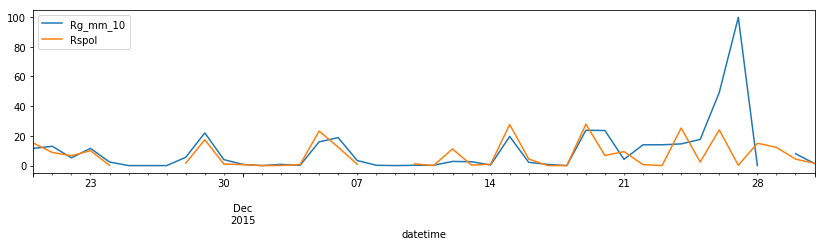

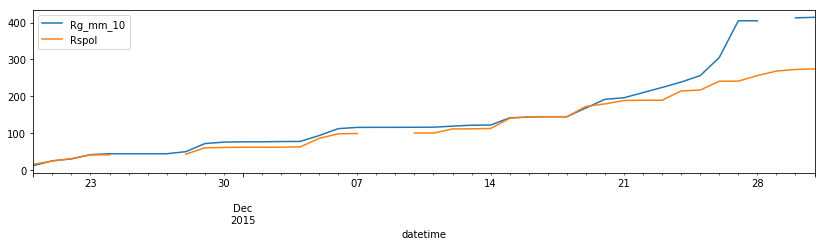

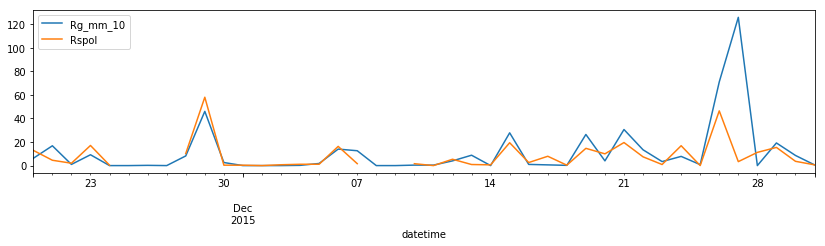

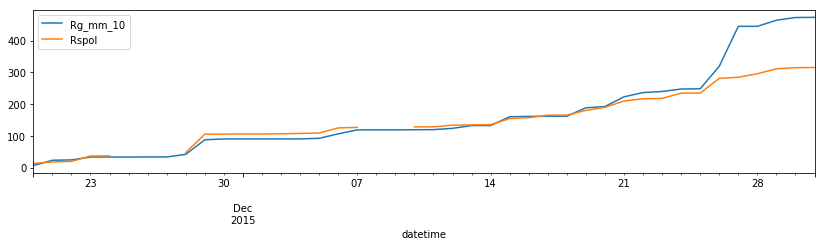

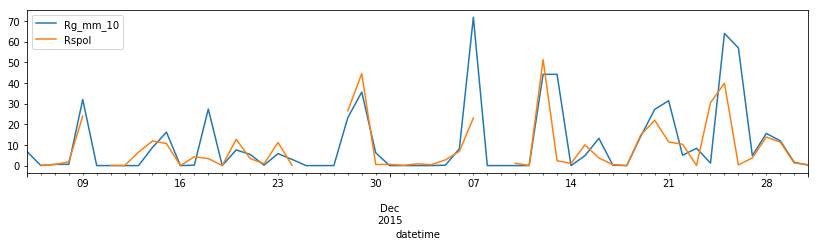

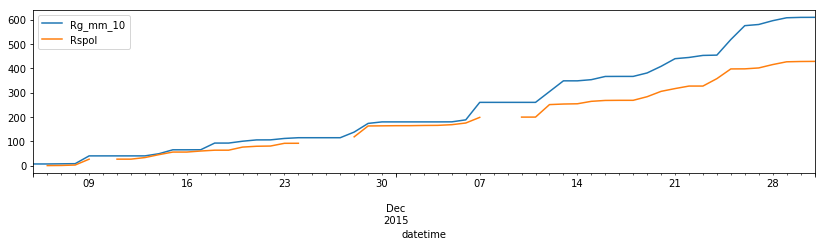

In [229]:
st=station_1d.loc[1000640,:]
st.loc['2015-11-20':'2015-12-31'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-11-20':'2015-12-31'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))
st=station_1d.loc[1000790,:]
st.loc['2015-11-20':'2015-12-31'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-11-20':'2015-12-31'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))
st=station_1d.loc[157,:]
st.loc['2015-11-05':'2015-12-31'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-11-05':'2015-12-31'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))

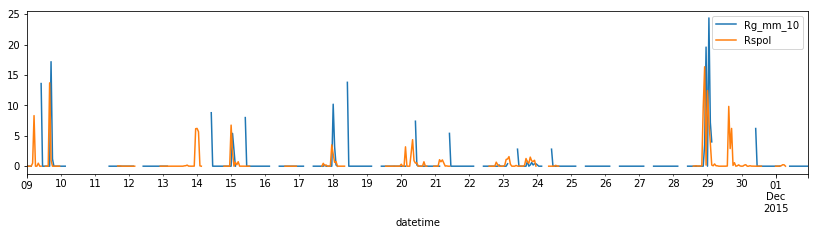

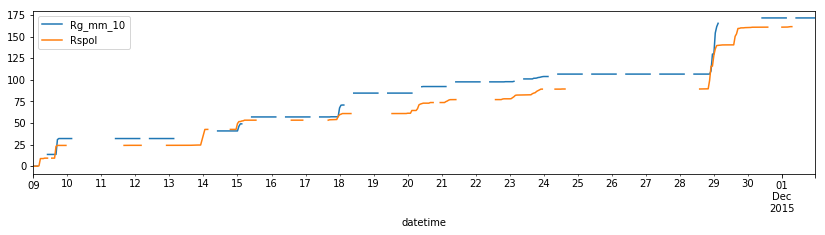

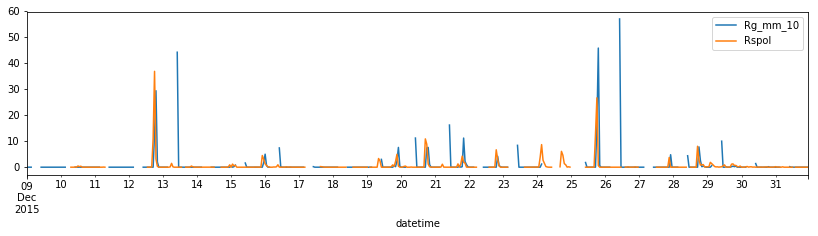

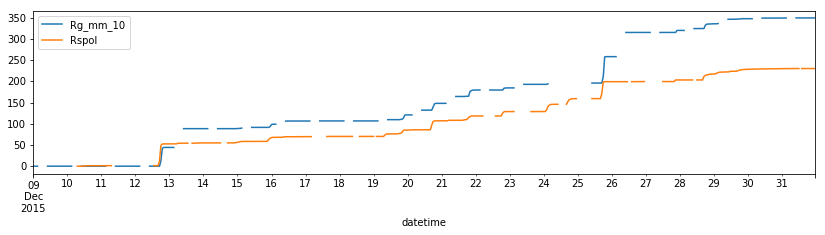

In [230]:
st=station_1h.loc[157,:]
st.loc['2015-11-09':'2015-12-01'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-11-09':'2015-12-01'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))
st.loc['2015-12-09':'2015-12-31'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-12-09':'2015-12-31'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))

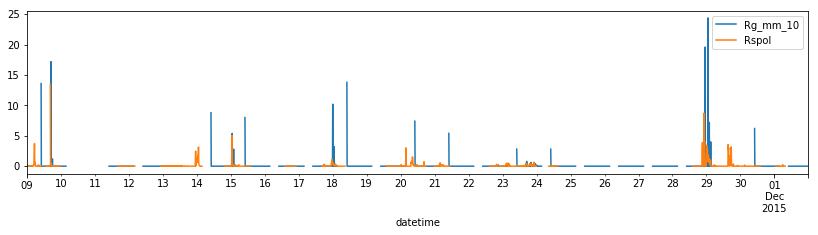

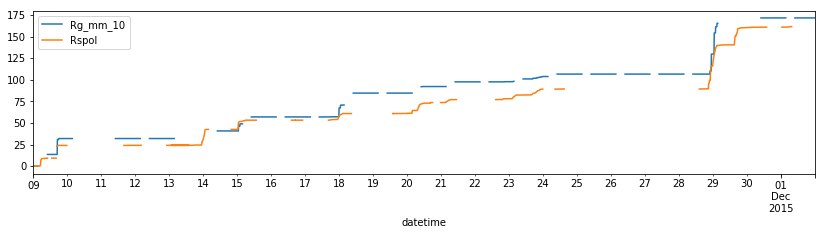

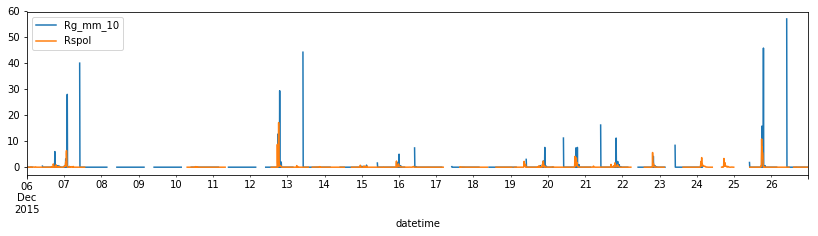

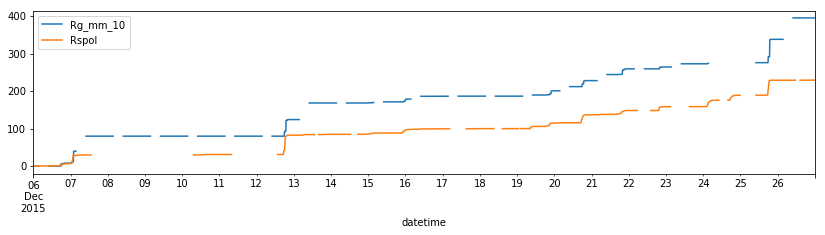

In [235]:
st=station_10m.loc[157,:]
st.loc['2015-11-09':'2015-12-01'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-11-09':'2015-12-01'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))
st.loc['2015-12-06':'2015-12-26'][['Rg_mm_10','Rspol']].plot(figsize=(14,3))
st.loc['2015-12-06':'2015-12-26'][['Rg_mm_10','Rspol']].cumsum().plot(figsize=(14,3))

In [28]:
with pd.option_context('mode.use_inf_as_null', True):
    var_log_gr_1d=station_1d.dropna().query('Rg_mm_10>@thr').log_2_gr_spol.groupby(level=0).sum()/station_1d.dropna().query('Rg_mm_10>@thr').log_2_gr_spol.groupby(level=0).count()
var_log_gr_1d=var_log_gr_1d.to_frame()
var_log_gr_1d=var_log_gr_1d.join(estacoes.r_spol)

In [29]:
with pd.option_context('mode.use_inf_as_null', True):
    var_log_gr_1h=station_1h.dropna().query('Rg_mm_10>@thr').log_2_gr_spol.groupby(level=0).sum()/station_1h.dropna().query('Rg_mm_10>@thr').log_2_gr_spol.groupby(level=0).count()
var_log_gr_1h=var_log_gr_1h.to_frame()
var_log_gr_1h=var_log_gr_1h.join(estacoes.r_spol)

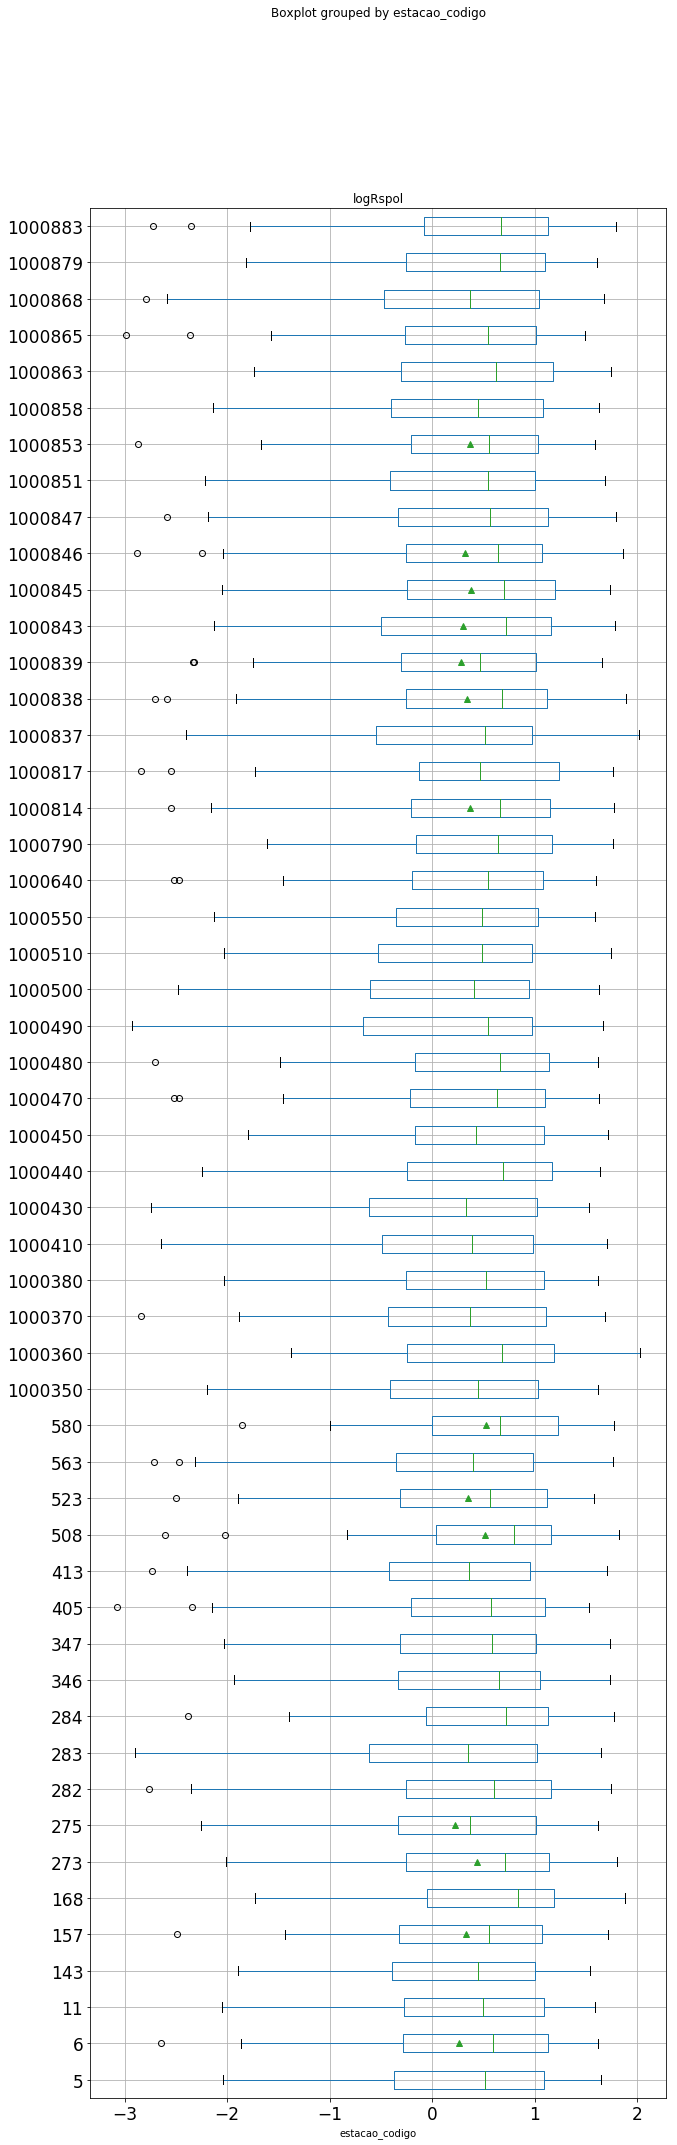

In [75]:
(station_1d.dropna().boxplot(by='estacao_codigo',column='logRspol',figsize=(10,35),fontsize=17,vert=False,showmeans=True)).figure.savefig('boxplot_log(Rradar_spol).png')

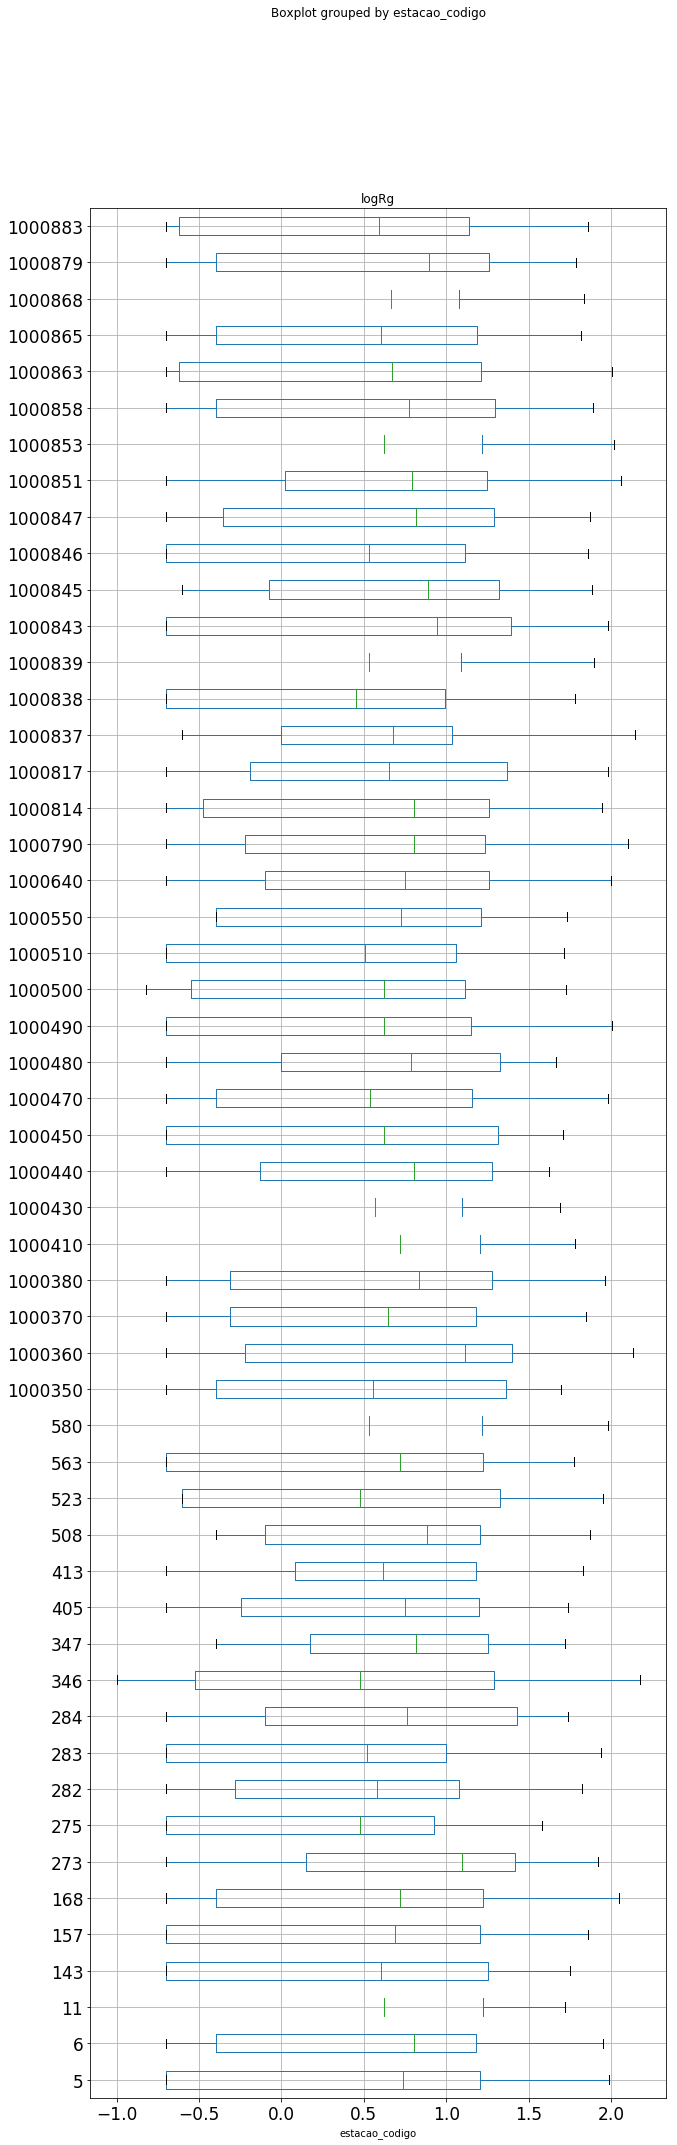

In [31]:
station_1d.dropna().boxplot(by='estacao_codigo',column='logRg',figsize=(10,35),fontsize=17,vert=False,showmeans=True)

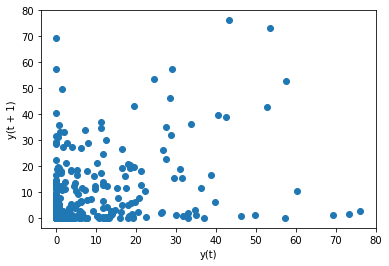

In [173]:
lag_plot(station_1d.loc[1000410,:].Rg_mm_10)

## Bias and RMSE

In [32]:
n=station_1h.query('Rg_mm_10>@thr and Rspol>@thr').Rg_mm_10.count()
soma=((station_1h.query('Rg_mm_10>@thr and Rspol>@thr').Rg_mm_10-station_1h.query('Rg_mm_10>@thr and Rspol>@thr').Rspol)**2).sum()
s_soma=(station_1h.query('Rg_mm_10>@thr and Rspol>@thr').Rg_mm_10-station_1h.query('Rg_mm_10>@thr and Rspol>@thr').Rspol).sum()
bias_1h_kdp=s_soma/(n-1)
print('1h DPSRI-gauges: bias = '+str(bias_1h_kdp))
rmse_1h_kdp=np.sqrt(soma/(n-1))
print('1h DPSRI-gauges: RMSE = '+str(rmse_1h_kdp))

1h DPSRI-gauges: bias = 1.00722529774
1h DPSRI-gauges: RMSE = 5.73148449763


In [33]:
n=station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].Rg_mm_10.count()
soma=((station_1d[(station_1d.Rg_mm_10>thr) &
           (station_1d.Rspol>thr)].Rg_mm_10-station_1d[(station_1d.Rg_mm_10>thr) &
                                                    (station_1d.Rspol>thr)].Rspol)**2).sum()
s_soma=(station_1d[(station_1d.Rg_mm_10>thr) &
           (station_1d.Rspol>thr)].Rg_mm_10-station_1d[(station_1d.Rg_mm_10>thr) &
                                                    (station_1d.Rspol>thr)].Rspol).sum()
bias_1d_kdp=s_soma/(n-1)
print('1d DPSRI-gaugues: bias = '+str(bias_1d_kdp))
rmse_1d_kdp=np.sqrt(soma/(n-1))
print('1d DPSRI-gauges: RMSE = '+str(rmse_1d_kdp))

1d DPSRI-gaugues: bias = 5.82018074916
1d DPSRI-gauges: RMSE = 16.3644679134


## Gauges vs Radar rainfall regressions

y = 0.303887346069 x + 2.1676719429


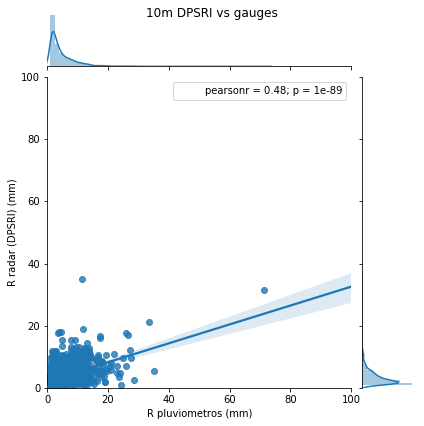

In [34]:
p1=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_10m[(station_10m.Rg_mm_10>thr) & (station_10m.Rspol>thr)],kind='reg',
                 xlim=(0,100),ylim=(0,100)))
p1.set_axis_labels("R pluviometros (mm)", "R radar (DPSRI) (mm)")
p1.fig.suptitle('10m DPSRI vs gauges')
p1.savefig('spol_10m.svg')
p1.savefig('spol_10m.png')
fit=np.polyfit(station_10m[(station_10m.Rg_mm_10>thr) & (station_10m.Rspol>thr)].Rg_mm_10,
               station_10m[(station_10m.Rg_mm_10>thr) & (station_10m.Rspol>thr)].Rspol,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))

y = 0.568801646954 x + 1.85974838862


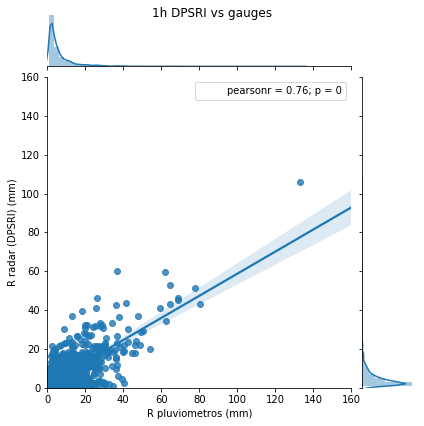

In [35]:
p1=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1h[(station_1h.Rg_mm_10>thr) & (station_1h.Rspol>thr)],kind='reg',
                 xlim=(0,160),ylim=(0,160)))
p1.set_axis_labels("R pluviometros (mm)", "R radar (DPSRI) (mm)")
p1.fig.suptitle('1h DPSRI vs gauges')
p1.savefig('spol_1H.svg')
p1.savefig('spol_1H.png')
fit=np.polyfit(station_1h[(station_1h.Rg_mm_10>thr) & (station_1h.Rspol>thr)].Rg_mm_10,
               station_1h[(station_1h.Rg_mm_10>thr) & (station_1h.Rspol>thr)].Rspol,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))

y = 0.380862996541 x + 6.54725608624


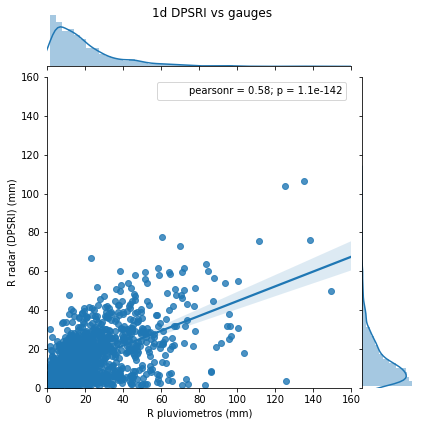

In [36]:
p2=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)],kind='reg',
                 xlim=(0,160),ylim=(0,160)))
p2.set_axis_labels("R pluviometros (mm)", "R radar (DPSRI) (mm)")
fit=np.polyfit(station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].Rg_mm_10,
               station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].Rspol,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))
p2.fig.suptitle('1d DPSRI vs gauges')
p2.savefig('spol_1d.svg')
p2.savefig('spol_1d.png')

y = 0.380862996541 x + 6.54725608624


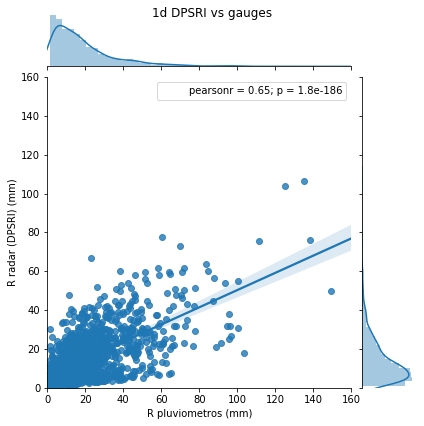

In [66]:
p2=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1d.query('Rg_mm_10>@thr & Rspol>@thr & Rg_mm_10/Rspol<10'),kind='reg',
                 xlim=(0,160),ylim=(0,160)))
p2.set_axis_labels("R pluviometros (mm)", "R radar (DPSRI) (mm)")
fit=np.polyfit(station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].Rg_mm_10,
               station_1d[(station_1d.Rg_mm_10>thr) & (station_1d.Rspol>thr)].Rspol,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))
p2.fig.suptitle('1d DPSRI vs gauges')
#p2.savefig('spol_1d.svg')
#p2.savefig('spol_1d.png')

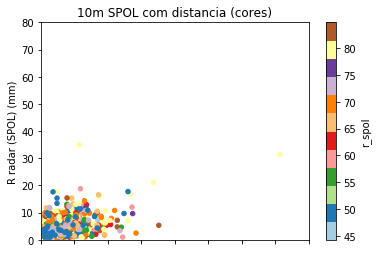

In [37]:
p3=station_10m.query('Rg_mm_10>@thr & Rspol>@thr').plot.scatter(y='Rspol',x='Rg_mm_10',c='r_spol',cmap='Paired',
                                                               xlim=(0,80),
                                                               ylim=(0,80),title='10m SPOL com distancia (cores)')
p3.set_xlabel("R pluviometros (mm)")
p3.set_ylabel("R radar (SPOL) (mm)")
p3.figure.savefig('spol_10m_distância.png')

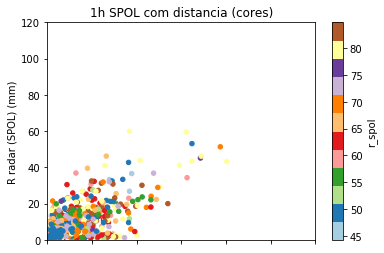

In [38]:
p3=station_1h.query('Rg_mm_10>@thr & Rspol>@thr').plot.scatter(y='Rspol',x='Rg_mm_10',c='r_spol',cmap='Paired',
                                                               xlim=(0,120),
                                                               ylim=(0,120),title='1h SPOL com distancia (cores)')
p3.set_xlabel("R pluviometros (mm)")
p3.set_ylabel("R radar (SPOL) (mm)")
p3.figure.savefig('spol_1h_distância.png')

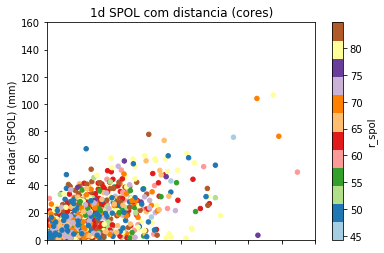

In [39]:
p3=station_1d.query('Rg_mm_10>@thr & Rspol>@thr').plot.scatter(y='Rspol',x='Rg_mm_10',c='r_spol',cmap='Paired',
                                                               xlim=(0,160),
                                                               ylim=(0,160),title='1d SPOL com distancia (cores)')
p3.set_xlabel("R pluviometros (mm)")
p3.set_ylabel("R radar (SPOL) (mm)")
p3.figure.savefig('spol_1d_distância.png')

y = 0.775985124041 x + 0.989114710499
y = 0.585631926907 x + 1.81090221502
y = 0.539902980965 x + 2.01042434711
y = 0.577715013167 x + 1.71571183221
y = 0.568801646954 x + 1.85974838862


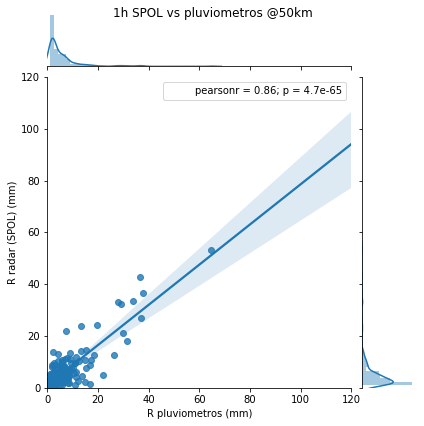

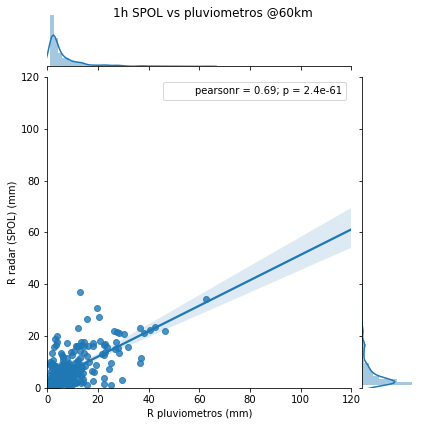

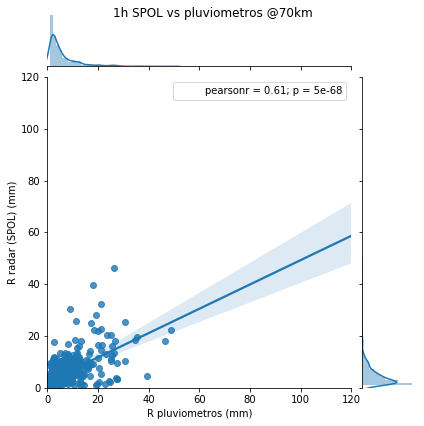

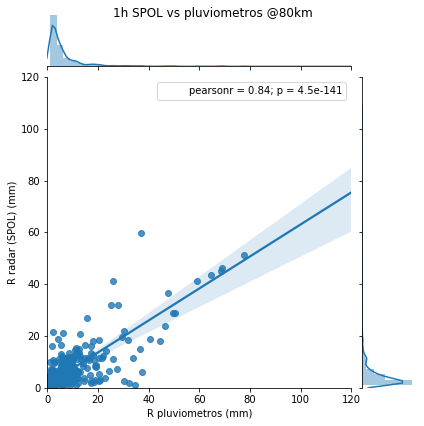

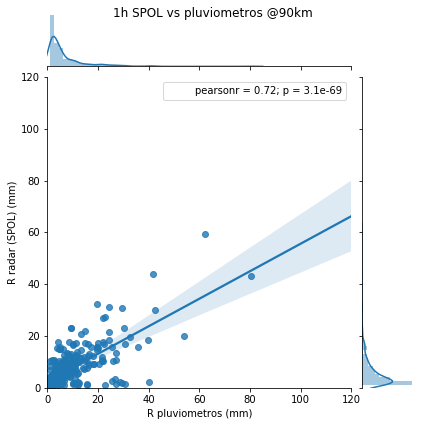

In [76]:
for dist in [50,60,70,80,90]:
    p2=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1h.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist & r_spol>@dist-10'),kind='reg',
                 xlim=(0,120),ylim=(0,120)))
    p2.set_axis_labels("R pluviometros (mm)", "R radar (SPOL) (mm)")
    fit=np.polyfit(station_1h.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist').Rg_mm_10,
               station_1h.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist').Rspol,deg=1)
    print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))
    p2.fig.suptitle('1h SPOL vs pluviometros @'+str(dist)+'km')
    p2.savefig('spol_1h_'+str(dist)+'km.png')

y = 0.42498041025 x + 6.62789236496
y = 0.347461097907 x + 7.23481353201
y = 0.369570210956 x + 6.58063245048
y = 0.390667526009 x + 6.19190472557
y = 0.380862996541 x + 6.54725608624


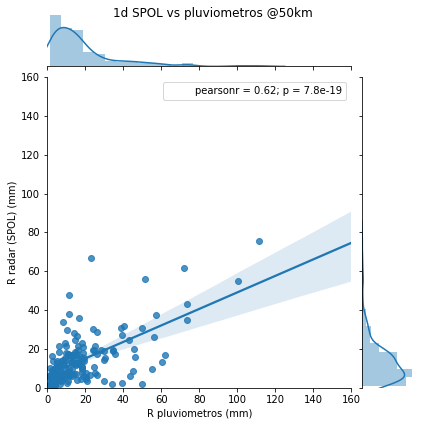

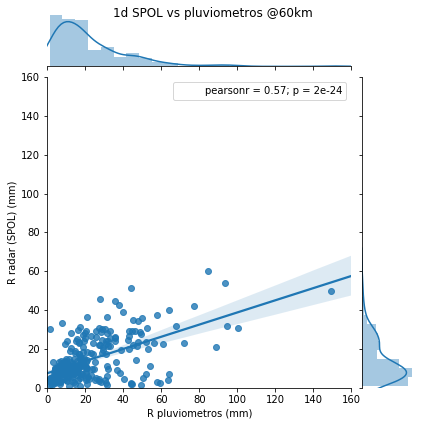

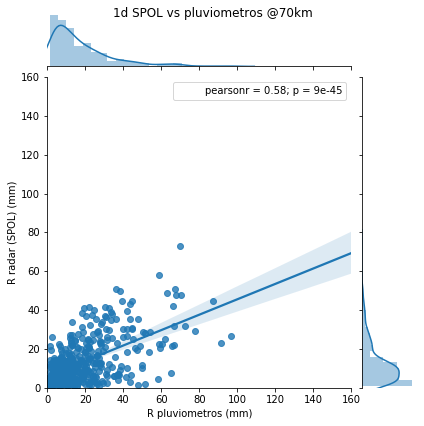

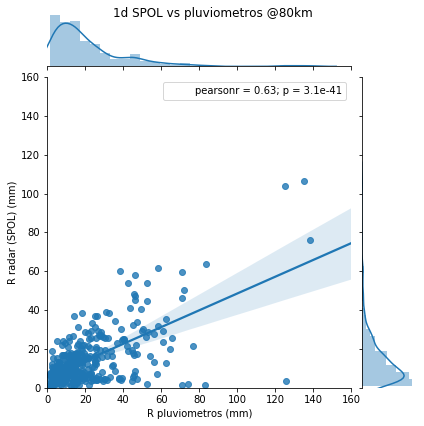

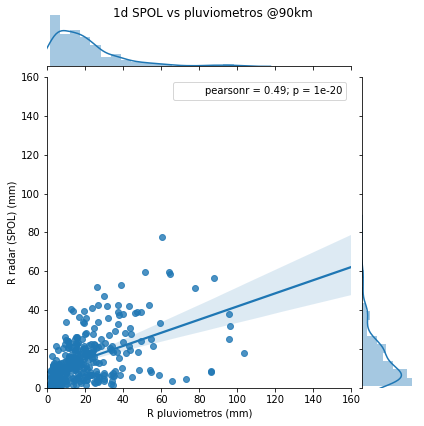

In [77]:
for dist in [50,60,70,80,90]:
    p2=(sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1d.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist & r_spol>@dist-10'),kind='reg',
                 xlim=(0,160),ylim=(0,160)))
    p2.set_axis_labels("R pluviometros (mm)", "R radar (SPOL) (mm)")
    fit=np.polyfit(station_1d.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist').Rg_mm_10,
               station_1d.query('Rg_mm_10>@thr & Rspol>@thr & r_spol<@dist').Rspol,deg=1)
    print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))
    p2.fig.suptitle('1d SPOL vs pluviometros @'+str(dist)+'km')
    p2.savefig('spol_1d_'+str(dist)+'km.png')

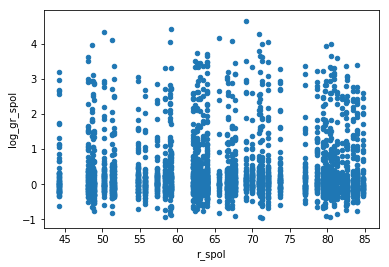

In [42]:
station_1h.query('Rg_mm_10>@thr').plot.scatter(y='log_gr_spol',x='r_spol')

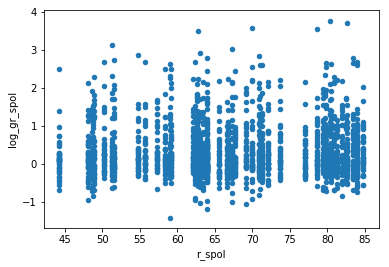

In [43]:
station_1d.query('Rg_mm_10>@thr').plot.scatter(y='log_gr_spol',x='r_spol')

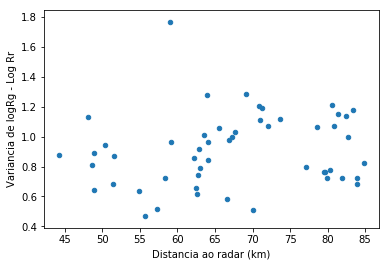

In [78]:
var_log_gr_1h.plot.scatter(y='log_2_gr_spol',x='r_spol').set(xlabel='Distancia ao radar (km)',
                                                             ylabel='Variancia de logRg - Log Rr')

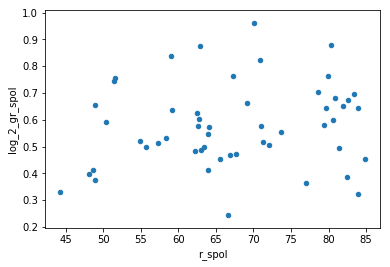

In [45]:
var_log_gr_1d.plot.scatter(y='log_2_gr_spol',x='r_spol')

## Contingency Tables for rainfall gauges vs rainfall radar

#pd.crosstab(station_2min.Rg_mm_10min>=0,station_2min.rz>=0)

pd.crosstab(station_10min.Rg_mm_10=0,station_10min.rz>=0)

In [46]:
station_1h[['Rg_mm_10','Rspol']].corr()

,Rg_mm_10,Rspol
Rg_mm_10,1.0000,0.5382
Rspol,0.5382,1.0000


In [47]:
station_1d[['Rg_mm_10','Rspol']].corr()

,Rg_mm_10,Rspol
Rg_mm_10,1.000000,0.638331
Rspol,0.638331,1.000000


In [48]:
pd.crosstab(station_10m.Rg_mm_10>thr,station_10m.Rspol>thr)

Rspol,False,True
Rg_mm_10,,
False,9204788,31314
True,26090,1548


In [49]:
pd.crosstab(station_1h.Rg_mm_10>thr,station_1h.Rspol>thr)

Rspol,False,True
Rg_mm_10,,
False,1486806,32050
True,22893,2232


In [50]:
pd.crosstab(station_1d.Rg_mm_10>thr,station_1d.Rspol>thr)

Rspol,False,True
Rg_mm_10,,
False,41660,11204
True,10002,1592
